# elon musk tweets

In [1]:
# import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string 
import spacy


from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline 
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# load the dataset

elon_tweets = pd.read_csv(r"Elon_musk.csv",encoding="Latin-1")
elon_tweets

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [3]:
# drop unnecessary column
# axis=1   ---> column wise drop
#axis=0  --> row wise drop 
elon_tweets.drop(['Unnamed: 0'],inplace=True,axis=1)
elon_tweets

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [4]:
len(elon_tweets)

1999

In [5]:
elon_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1999 non-null   object
dtypes: object(1)
memory usage: 15.7+ KB


In [6]:
# importing regular expression

import re
import string 

def clean_text(text):
    '''make text lowercase ,remove text in square brackerts,remove punctuation and remove words containing numbers.'''

    text  = text.lower()
    text  = re.sub('\[.*?\]','',text)
    text  = re.sub('[%s]' % re.escape(string.punctuation), '',text)
    text  = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text  = re.sub('[‘’“”…]', '',text)
    return text 
                    
clean = lambda x: clean_text(x)

In [7]:
# clean text

elon_tweets['Text'] =elon_tweets.Text.apply(clean)
elon_tweets.Text

#elon_tweets['Text'] = elon_tweets.Text.apply(clean)
#elon_tweets.Text

0                                            im an alien
1       idaacarmack ray tracing on cyberpunk with hdr ...
2                        joerogan spotify great interview
3                                  doge is underestimated
4       teslacn congratulations tesla china for amazin...
                              ...                        
1994    flcnhvy true it sounds so surreal but the nega...
1995    ppathole make sure to read ur terms amp condit...
1996                    teslagong ppathole samwise gamgee
1997                   ppathole altho dumb and dumber is 
1998                              progress update august 
Name: Text, Length: 1999, dtype: object

In [8]:
# word frequency

frequency = pd.Series( ' '.join(elon_tweets['Text']).split()).value_counts()[:20]
frequency

the               486
to                400
a                 355
is                355
of                315
spacex            239
in                219
amp               218
for               194
tesla             166
will              165
be                157
erdayastronaut    142
this              140
it                137
we                135
on                129
that              127
rt                127
but               126
dtype: int64

In [9]:
# removing some stopwords

from nltk.corpus import stopwords
stop = stopwords.words('english')
elon_tweets['Text'] = elon_tweets['Text'].apply(lambda x:" ".join(x for x in x.split() if x not in stop))

In [10]:
# removing blank spaces
remove_blank_spaces = [Text.strip() for Text in elon_tweets.Text] 
# removing blank lines 
remove_blank_lines = [Text for Text in remove_blank_spaces if  Text]

In [11]:
# tokenization

from nltk import tokenize
tokenize_word = tokenize.word_tokenize(" ".join(remove_blank_lines))
tokenize_word[0:15]

['i\x92m',
 'alien',
 'idaacarmack',
 'ray',
 'tracing',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'tried',
 'joerogan',
 'spotify',
 'great',
 'interview',
 'doge',
 'underestimated']

In [12]:
# getting basic word byb lemitization

from nltk.stem import WordNetLemmatizer


In [13]:
lemmatizer = WordNetLemmatizer()

In [14]:
lematized_tokens = [lemmatizer.lemmatize(word) for word in tokenize_word] 

In [15]:
print(lematized_tokens)

['i\x92m', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'doge', 'underestimated', 'teslacn', 'congratulation', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'thought', 'would', 'fail', 'httpstcozgxjfdzzrm', 'owensparks', 'flcnhvy', 'haha', 'thanks', 'flcnhvy', 'indeed', 'tweet', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'entertaining', 'outcome', 'likely', 'givedirectly', 'sent', 'agree', 'clubhouse', 'kanyewest', 'geoffkeighley', 'unrealengine', 'it\x92s', 'getting', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'joshmanmode', 'definitely', 'issue', 'sentencing', 'seems', 'bit', 'high', 'freewalletorg', 'thanks', 'fixing', 'freewalletorg', 'please', 'unlock', 'account', 'astrojordy', 'true', 'power', 'haha', 'freewalletorg', 'crypto', 'wallet', 'won\x92t', 'give', 'private', 'key', 'avoi

In [16]:
tweets_join_again = " ".join(lematized_tokens)
tweets_join_again

'i\x92m alien idaacarmack ray tracing cyberpunk hdr nextlevel tried joerogan spotify great interview doge underestimated teslacn congratulation tesla china amazing execution last year next even happy new year ox frodo underdoge thought would fail httpstcozgxjfdzzrm owensparks flcnhvy haha thanks flcnhvy indeed tweet definitely represent realworld time allocation entertaining outcome likely givedirectly sent agree clubhouse kanyewest geoffkeighley unrealengine it\x92s getting real bought dogecoin lil x toddler hodler joshmanmode definitely issue sentencing seems bit high freewalletorg thanks fixing freewalletorg please unlock account astrojordy true power haha freewalletorg crypto wallet won\x92t give private key avoided cost freewalletorg app suck rt spacex nasa selected falcon heavy launch first two element lunar gateway together one mission ajtourville yes rationaletienne adamklotz predict cash flow reasonably well starlink ipo rationaletienne adamklotz starlink staggeringly difficul

In [17]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

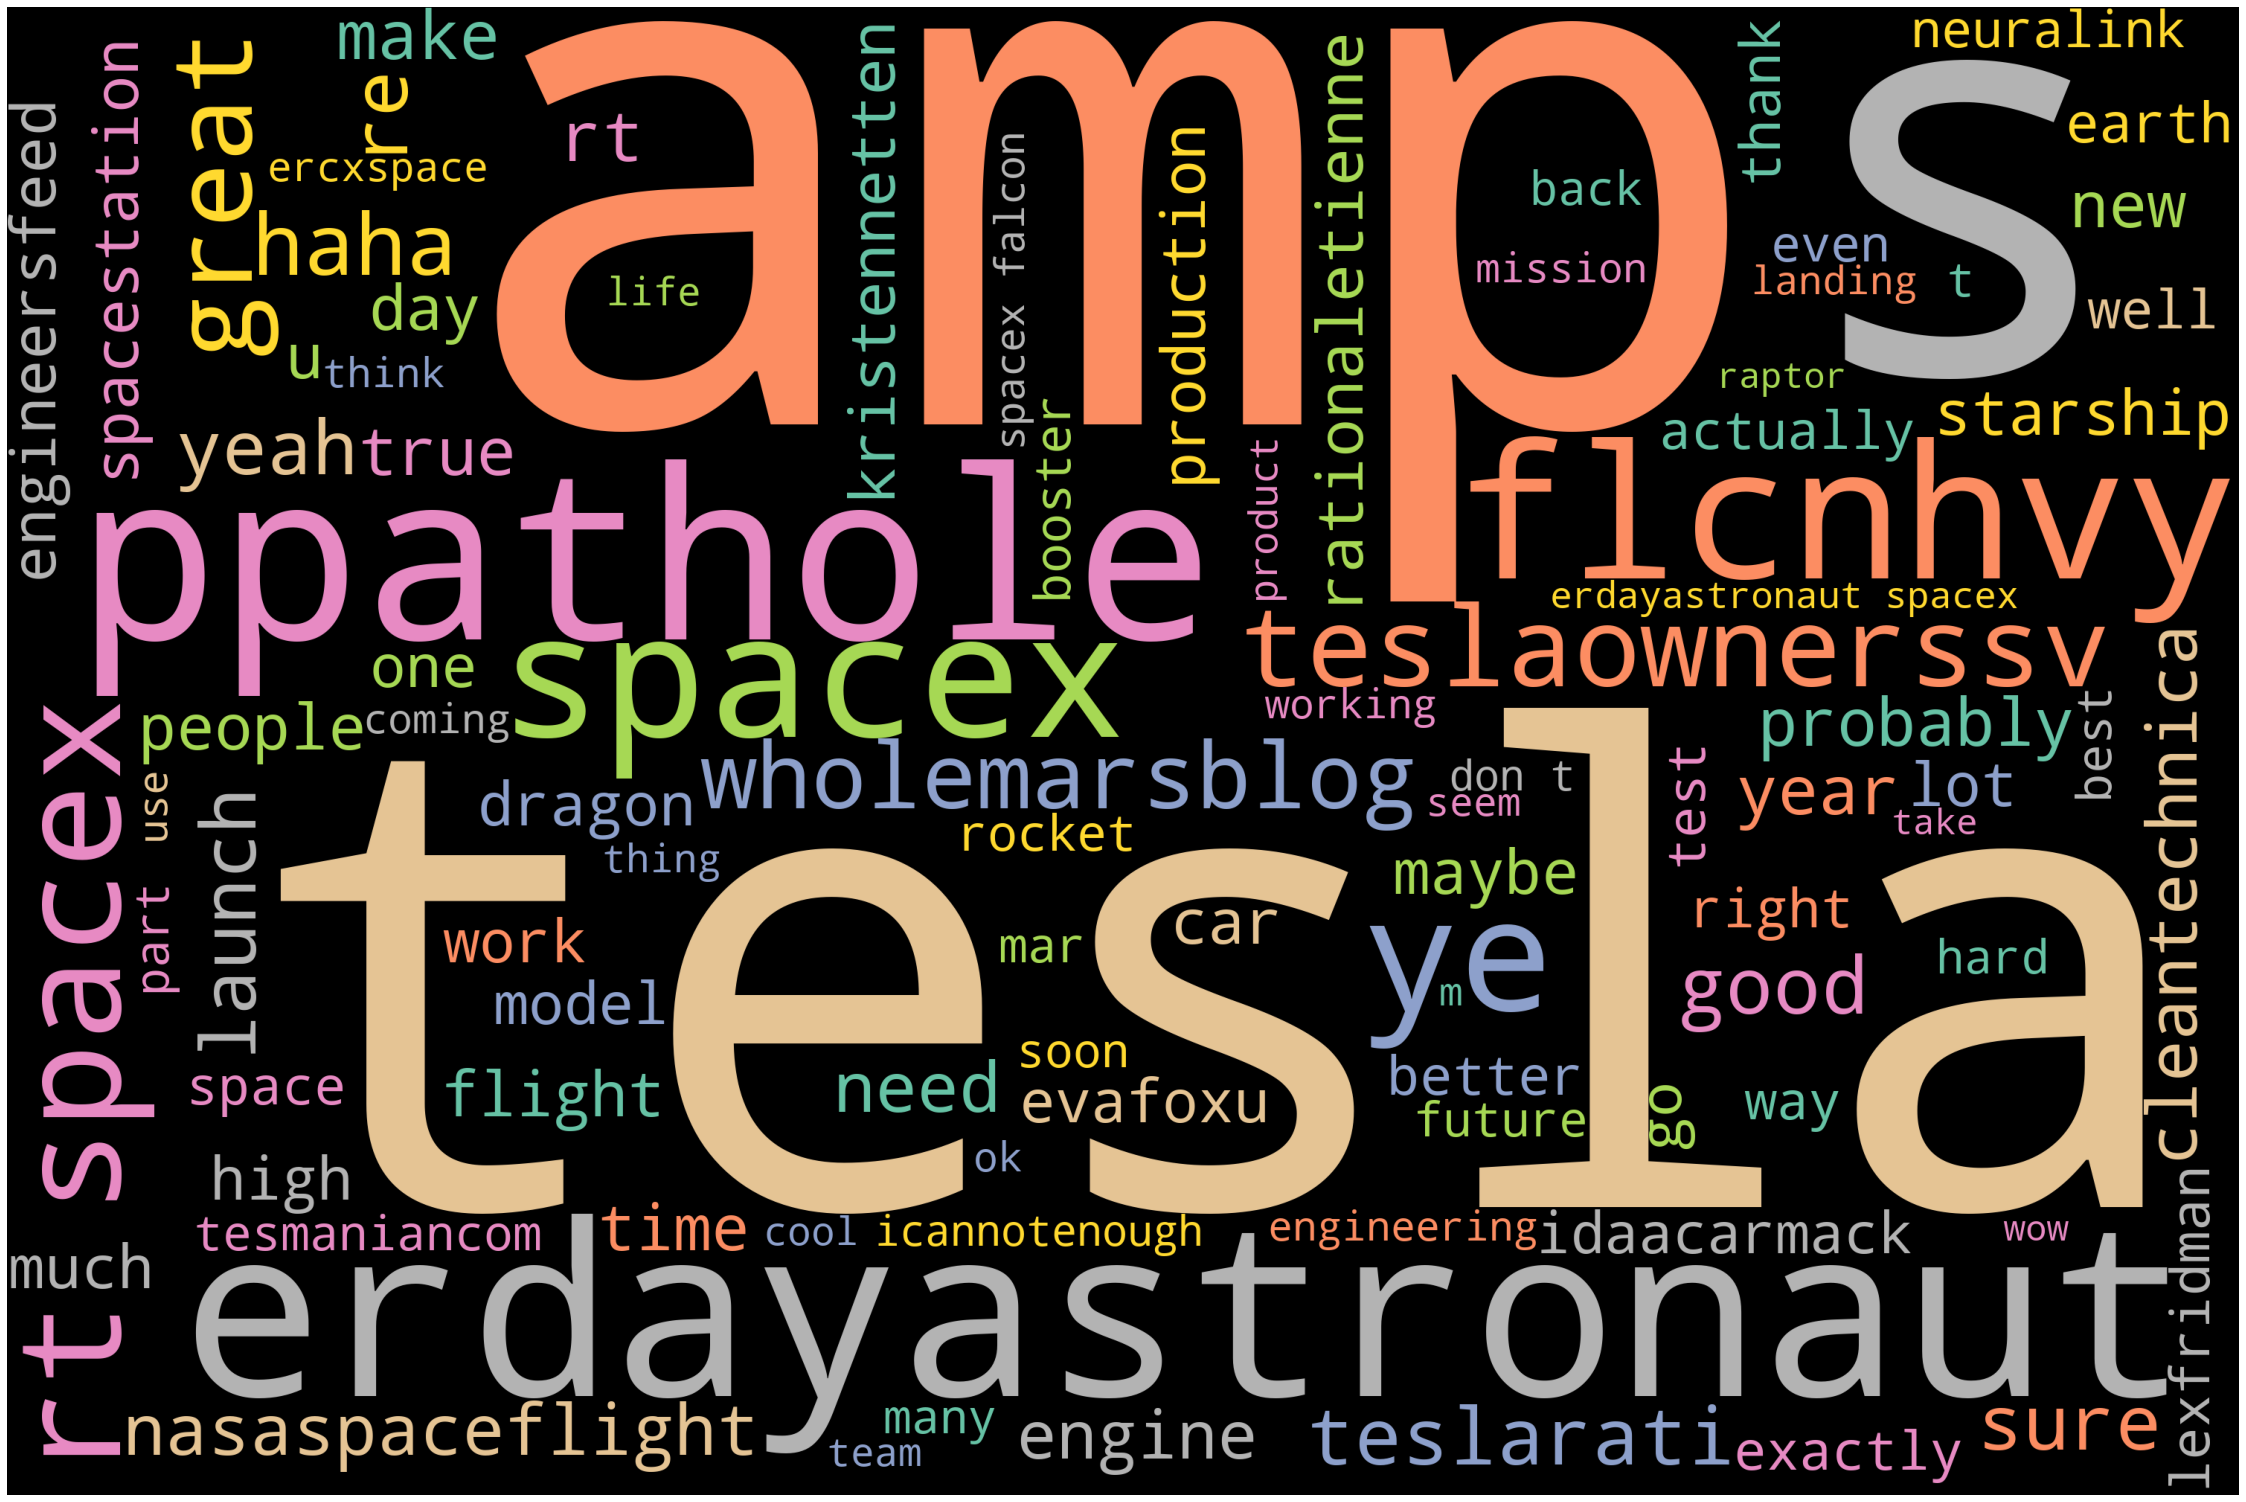

In [18]:
stopwords= STOPWORDS
wordcloud= WordCloud(width = 3000,height =2000,background_color="black",
                    max_words =100,colormap='Set2',stopwords=stopwords).generate(tweets_join_again)

plot_cloud(wordcloud)                     

# feature extraction



using count vectorization

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer(min_df=1,max_df=0.9) # drop low frequency term and high frequency term
tweets_vectorizer=vectorizer.fit_transform(lematized_tokens)
word_freq_df=pd.DataFrame({'term': vectorizer.get_feature_names(),'occurrences':np.asarray(tweets_vectorizer.sum(axis=0)).
                                                                                             ravel().tolist()})
word_freq_df['frequecy']= word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [20]:
word_freq_df.sort_values('occurrences',ascending= False).head()

,term,occurrences,frequecy
3393,spacex,246,0.018427
143,amp,218,0.016330
3651,tesla,170,0.012734
1149,erdayastronaut,142,0.010637
3117,rt,127,0.009513


In [21]:
word_freq_df.shape

(4189, 3)

# named entity recognision 

In [22]:
!pip install en_core_web_lg


ERROR: Could not find a version that satisfies the requirement en_core_web_lg (from versions: none)
ERROR: No matching distribution found for en_core_web_lg
You should consider upgrading via the 'C:\Users\DELL\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [23]:
nlp = spacy.load('en_core_web_sm')

entity=tweets_join_again
named_entity=nlp(entity)
spacy.displacy.render(named_entity, style='ent')

In [24]:
for token in named_entity[10:30]:
    print(token,token.pos_)

spotify VERB
great ADJ
interview NOUN
doge PROPN
underestimated VERB
teslacn PROPN
congratulation PROPN
tesla PROPN
china PROPN
amazing ADJ
execution NOUN
last ADJ
year NOUN
next ADV
even ADV
happy ADJ
new ADJ
year NOUN
ox NOUN
frodo NOUN


In [25]:
# filtering for nouns and verbs only

nouns_verbs = [token.text for token in named_entity if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[10:30])

['year', 'ox', 'frodo', 'thought', 'fail', 'httpstcozgxjfdzzrm', 'owensparks', 'thanks', 'represent', 'time', 'allocation', 'entertaining', 'outcome', 'sent', 'clubhouse', 'unrealengine', 'it\x92s', 'getting', 'bought', 'dogecoin']


In [26]:
# counting tokenization again

cv= CountVectorizer()
x=cv.fit_transform(nouns_verbs)
sum_words=x.sum(axis=0)
words_freq=[(word,sum_words[0,idx])for word, idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x: x[1],reverse=True)
wf_df=pd.DataFrame(words_freq)
wf_df.columns=['word','count']
wf_df[0:10]


,word,count
0,spacex,214
1,amp,184
2,tesla,96
3,ppathole,78
4,launch,54
5,erdayastronaut,53
6,year,47
7,nasaspaceflight,44
8,teslaownerssv,43
9,wholemarsblog,43


# sentiment analyssis


In [27]:
!python  -m spacy download en_core_web_sm

     ---------------------------------------- 13.9/13.9 MB 3.3 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


You should consider upgrading via the 'C:\Users\DELL\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [28]:
sentence = pd.read_csv('Elon_musk.csv',encoding='Latin-1')

In [29]:
data = [Text.strip() for Text in sentence.Text] # removed both leading and trailing charector
data = [Text for Text in data if Text]

In [30]:
!pip install affin

ERROR: Could not find a version that satisfies the requirement affin (from versions: none)
ERROR: No matching distribution found for affin
You should consider upgrading via the 'C:\Users\DELL\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [31]:
affin = pd.read_csv('Afinn.csv',sep = ",",encoding='latin-1')
affin.shape

(2477, 2)

In [32]:
affin.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [33]:
from itertools import islice
def take(n,iterable):
    'Return first n items of the iterable as a list'
    return list(islice(iterable,n))

In [34]:
affinity_scores = affin.set_index('word')['value'].to_dict()
take(20,affinity_scores.items())

[('abandon', -2),
 ('abandoned', -2),
 ('abandons', -2),
 ('abducted', -2),
 ('abduction', -2),
 ('abductions', -2),
 ('abhor', -3),
 ('abhorred', -3),
 ('abhorrent', -3),
 ('abhors', -3),
 ('abilities', 2),
 ('ability', 2),
 ('aboard', 1),
 ('absentee', -1),
 ('absentees', -1),
 ('absolve', 2),
 ('absolved', 2),
 ('absolves', 2),
 ('absolving', 2),
 ('absorbed', 1)]

In [35]:
from nltk import tokenize

sentences = tokenize.sent_tokenize( ' '.join(data))
sentences

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [36]:
sent_df = pd.DataFrame(sentences,columns=['sentences'])
sent_df

,sentences
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
919,"@kenyanwalstreet Not actually a payout, just a..."
920,"It may never pay out, as the stock cant b ht..."
921,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...


In [37]:
nlp = spacy.load("en_core_web_sm")
sentiment_lexicon = affinity_scores

def calculate_sentiment(Text: str = None):
    sent_score = 0
    if Text:
        clean = nlp(Text)
        for word in clean:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [38]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
my_stopwords = stopwords.words("english")
my_stopwords[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [43]:
#removing stopwords
sent_df['sentence1'] = sent_df['sentences'].apply(lambda x: ' '.join([x for x in x.split() if x not in (my_stopwords)]))

In [44]:
#removing punctuations
sent_df['clean'] = sent_df['sentence1'].apply(lambda x: ' '.join([x for x in x.split() if x not in string.punctuation]))

In [45]:
sent_df

,sentences,sentence1,clean
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,@kunalb11 Im alien @ID_AA_Carmack Ray tracing...,@kunalb11 Im alien @ID_AA_Carmack Ray tracing...
1,Have you tried it?,Have tried it?,Have tried it?
2,@joerogan @Spotify Great interview!,@joerogan @Spotify Great interview!,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...,@gtera27 Doge underestimated @teslacn Congratu...,@gtera27 Doge underestimated @teslacn Congratu...
4,Now on to the next for even more!!,Now next even more!!,Now next even more!!
...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...","@kenyanwalstreet Not actually payout, vesting ...","@kenyanwalstreet Not actually payout, vesting ..."
920,"It may never pay out, as the stock cant b ht...","It may never pay out, stock cant b https://t....","It may never pay out, stock cant b https://t...."
921,Details Aug 28.,Details Aug 28.,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...,AI symbiosis u wait @vistacruiser7 @flcnhvy Th...,AI symbiosis u wait @vistacruiser7 @flcnhvy Th...


In [46]:
sent_df = sent_df.drop('sentence1',axis=1)

In [48]:
sent_df = sent_df.drop('sentences',axis=1)

In [60]:
# calculating thw sentiment value for each sentence

sent_df['sentiment']  = sent_df['clean'].apply(calculate_sentiment)

In [61]:
#word count for "clean"column

sent_df['word_count']  = sent_df['clean'].str.split().apply(len)

In [62]:
sent_df

,clean,word_count,sentiment
0,@kunalb11 Im alien @ID_AA_Carmack Ray tracing...,9,0
1,Have tried it?,3,0
2,@joerogan @Spotify Great interview!,4,3
3,@gtera27 Doge underestimated @teslacn Congratu...,11,3
4,Now next even more!!,4,0
...,...,...,...
919,"@kenyanwalstreet Not actually payout, vesting ...",7,0
920,"It may never pay out, stock cant b https://t....",21,-4
921,Details Aug 28.,3,0
922,AI symbiosis u wait @vistacruiser7 @flcnhvy Th...,29,-2


In [64]:
# sort based on sentiment value

sent_df.sort_values(by = 'sentiment').head(10)

,clean,word_count,sentiment
647,Very ba https://t.co/tJsh1Exz1Q @justpaulinelo...,41,-8
64,"Also, road hell mostly paved bad intentions.",7,-7
837,Cool Model 3 review @iamjamiefoxx https://t.co...,45,-5
680,"Occasional flights land ok, frequent (daily) f...",26,-4
920,"It may never pay out, stock cant b https://t....",21,-4
611,"Then static fire, checkouts, static fire, fly ...",11,-4
718,That bs pushed Eberhard (worst person Ive eve...,19,-3
411,Jack Box double duty sperm donor clinic  name...,46,-3
296,"No symptoms past days, apart fatigue.",6,-3
219,@RGVaerialphotos It real soon @MarcusHouseGame...,13,-3


In [65]:
sent_df.sort_values(by='sentiment').head(10)

,clean,word_count,sentiment
647,Very ba https://t.co/tJsh1Exz1Q @justpaulinelo...,41,-8
64,"Also, road hell mostly paved bad intentions.",7,-7
837,Cool Model 3 review @iamjamiefoxx https://t.co...,45,-5
680,"Occasional flights land ok, frequent (daily) f...",26,-4
920,"It may never pay out, stock cant b https://t....",21,-4
611,"Then static fire, checkouts, static fire, fly ...",11,-4
718,That bs pushed Eberhard (worst person Ive eve...,19,-3
411,Jack Box double duty sperm donor clinic  name...,46,-3
296,"No symptoms past days, apart fatigue.",6,-3
219,@RGVaerialphotos It real soon @MarcusHouseGame...,13,-3


In [66]:
sent_df['sentiment'].describe() #max sentiment value=16 and min sentiment value=-8

count    924.000000
mean       1.387446
std        2.687255
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       17.000000
Name: sentiment, dtype: float64

In [67]:
#sentiment value less than or equal to 0
sent_df[sent_df['sentiment']<=0]

,clean,word_count,sentiment
0,@kunalb11 Im alien @ID_AA_Carmack Ray tracing...,9,0
1,Have tried it?,3,0
4,Now next even more!!,4,0
5,Happy New Year Ox!,4,0
6,"https://t.co/9WFKMYu2oj Frodo underdoge, All t...",9,-2
...,...,...,...
919,"@kenyanwalstreet Not actually payout, vesting ...",7,0
920,"It may never pay out, stock cant b https://t....",21,-4
921,Details Aug 28.,3,0
922,AI symbiosis u wait @vistacruiser7 @flcnhvy Th...,29,-2


In [68]:
#sentiment value greater than 0
sent_df[sent_df['sentiment']>0]

,clean,word_count,sentiment
2,@joerogan @Spotify Great interview!,4,3
3,@gtera27 Doge underestimated @teslacn Congratu...,11,3
7,https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy ...,10,2
9,The entertaining outcome likely @GiveDirectly ...,74,3
17,Back work I go @CapybaraSurfer @MattWallace888...,28,4
...,...,...,...
911,He one best.,3,3
913,"@Ali_Afshari In general, need improve podcasts...",72,4
915,"@burakaydik True Wow, IHOP &amp; GitHub close ...",12,3
917,This great &amp; terrifying.,4,3


In [73]:
sent_df['index']=range(0,len(sent_df))

In [74]:
sent_df

,clean,word_count,sentiment,index
0,@kunalb11 Im alien @ID_AA_Carmack Ray tracing...,9,0,0
1,Have tried it?,3,0,1
2,@joerogan @Spotify Great interview!,4,3,2
3,@gtera27 Doge underestimated @teslacn Congratu...,11,3,3
4,Now next even more!!,4,0,4
...,...,...,...,...
919,"@kenyanwalstreet Not actually payout, vesting ...",7,0,919
920,"It may never pay out, stock cant b https://t....",21,-4,920
921,Details Aug 28.,3,0,921
922,AI symbiosis u wait @vistacruiser7 @flcnhvy Th...,29,-2,922


C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment', ylabel='Density'>

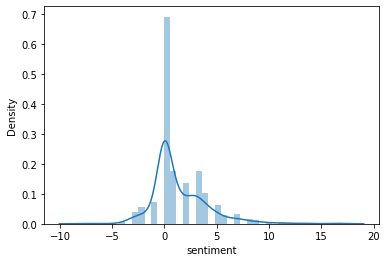

In [69]:
#densityplot based on sentiment value
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment'])

<AxesSubplot:xlabel='index', ylabel='sentiment'>

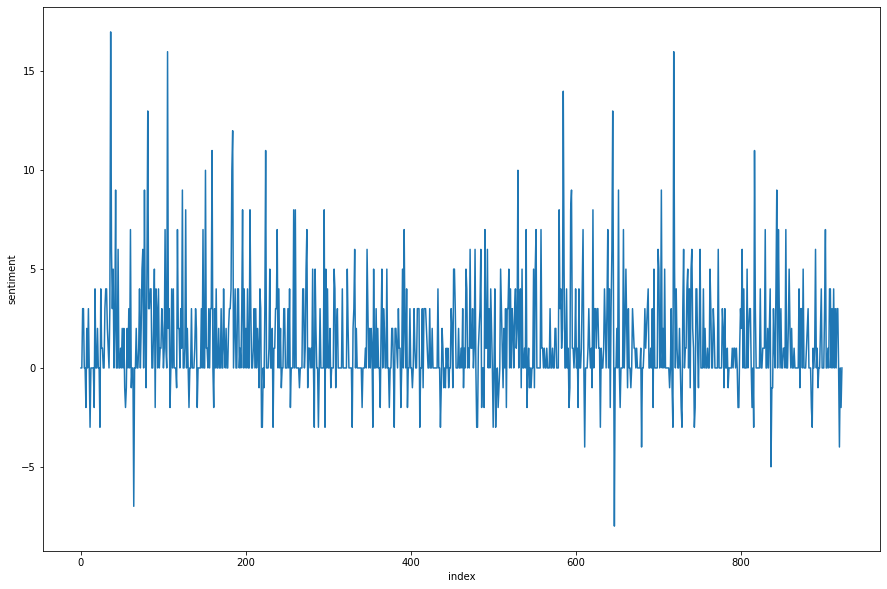

In [75]:
#lineplot based on sentiment value
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment',x='index',data=sent_df)